# Project 4A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [2]:
inputFile: str = "nhanes.csv"

In [3]:
df: pd.DataFrame = pd.read_csv(inputFile)

1. Take 10 random samples of age data from nhanes, five with a sample size of 20 (A), five with a sample size of 200 (B):   
2. Compute the means of each sample in A 
3. Compute the means of each sample in B
4. Compute the population mean (C)
5. Compare the results of A, B, C

In [4]:
# 1. Take 10 random samples of age data from nhanes, five with a sample size of 20 (A), five with a sample size of 200 (B)
sample_A: List = [df['Age'].sample(n=20) for i in range(5)]
sample_B: List = [df['Age'].sample(n=200) for i in range(5)]

In [5]:
# 2. Compute the means of each sample in A
means_A: List = [s.mean().item() for s in sample_A]
print('Means of samples in A (n=20):', means_A)

Means of samples in A (n=20): [31.95, 38.75, 35.45, 39.95, 31.75]


In [6]:
# 3. Compute the means of each sample in B
means_B: List = [s.mean().item() for s in sample_B]
print('Means of samples in B (n=200):', means_B)

Means of samples in B (n=200): [38.03, 38.18, 36.155, 37.495, 38.675]


In [7]:
# 4. Compute the population mean (C)
mean_C = df['Age'].mean().item()
print('Population mean (C):', mean_C)

Population mean (C): 36.7421


In [8]:
# 5. Compare the results of A, B, C
print('Means of samples in A (n=20):', means_A)
print('Means of samples in B (n=200):', means_B)
print('Population mean (C):', mean_C)

Means of samples in A (n=20): [31.95, 38.75, 35.45, 39.95, 31.75]
Means of samples in B (n=200): [38.03, 38.18, 36.155, 37.495, 38.675]
Population mean (C): 36.7421


1. Compute and display the standard deviation of ‘Age’ over the two samples and the population. Anything interesting?
2. Compute histograms of
    - the age of the population
    - one of the samples from A
    - one of the samples from B

In [9]:
# 1. Compute and display the standard deviation of ‘Age’ over the two samples and the population
stds_A = [s.std(ddof=1).item() for s in sample_A]
print('Standard deviations of samples in A (n=20):', stds_A)

Standard deviations of samples in A (n=20): [20.78328022334553, 20.98088102108805, 22.511926663554657, 22.141827528814993, 20.393174812847764]


In [10]:
stds_B = [s.std(ddof=1).item() for s in sample_B]
print('Standard deviations of samples in B (n=200):', stds_B)

Standard deviations of samples in B (n=200): [22.367400452781173, 23.84302938494302, 20.850291322693938, 22.285718323761298, 22.514526299088814]


In [11]:
std_pop = df['Age'].std(ddof=1).item()
print('Population standard deviation:', std_pop)

Population standard deviation: 22.397565775888875


In [12]:
# Use the first sample from each list for illustration
pop_ages = df['Age'].dropna()
sample_a_1 = sample_A[0].dropna()
sample_b_1 = sample_B[0].dropna()

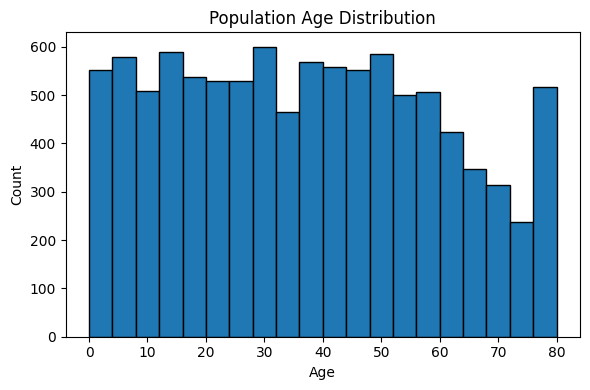

In [13]:
# Plot population histogram
plt.figure(figsize=(6,4))
plt.hist(pop_ages, bins=20, color='C0', edgecolor='black')
plt.title('Population Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

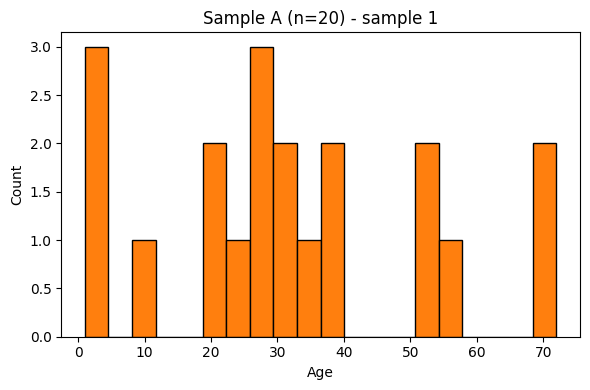

In [14]:
# Plot sample A
plt.figure(figsize=(6,4))
plt.hist(sample_a_1, bins=20, color='C1', edgecolor='black')
plt.title('Sample A (n=20) - sample 1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

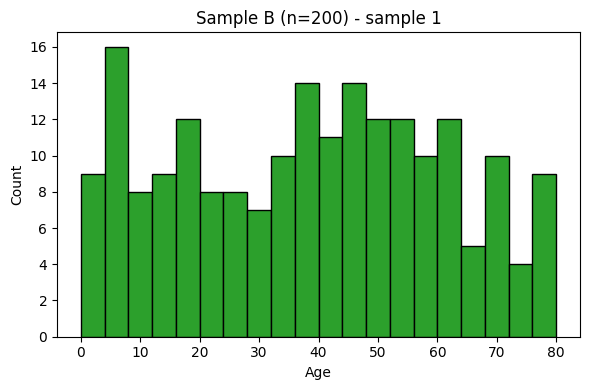

In [15]:
# Plot sample B
plt.figure(figsize=(6,4))
plt.hist(sample_b_1, bins=20, color='C2', edgecolor='black')
plt.title('Sample B (n=200) - sample 1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Project 4A Conclusions

The data from nhanes is, as expected, more representative of a younger population with a downward trend as the age distribution increases. The age distributions from samples of size 20 represent a more biased slice, wheras the 200 count samples are distributed more equally. Thus, the larger a sample size, the greater the distibution size and, by extension, the greater the variety of data.

# Project 4B

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [17]:
inputFile: str = "nhanes.csv"

In [18]:
df: pd.DataFrame = pd.read_csv(inputFile)

1. What is the probability of a person over 65 having diabetes
2. What is the probability of males over 65 having diabetes
3. What is the probability of females over 65 having diabetes
4. What is the probability of smokers over 65 having diabetes
5. Does smoking differ by age? Compute a histogram of smokers with the interval being 10 years.

- Conjecture: Men, women, people over 65, smokers all have different rates of diabetes 
- Null Hypothesis: All four populations have the same diabetes rate
- Alternative Hypothesis: The four populations differ in diabetes rate

In [19]:
# Create 65 and Up specific DataFrame
over_65 = df[df['Age'] > 65]
print(df.head())

      ID SurveyYr  Gender  Age AgeDecade  AgeMonths  Race1 Race3  \
0  51624  2009_10    male   34     30-39      409.0  White   NaN   
1  51624  2009_10    male   34     30-39      409.0  White   NaN   
2  51624  2009_10    male   34     30-39      409.0  White   NaN   
3  51625  2009_10    male    4       0-9       49.0  Other   NaN   
4  51630  2009_10  female   49     40-49      596.0  White   NaN   

      Education MaritalStatus  ... RegularMarij  AgeRegMarij  HardDrugs  \
0   High School       Married  ...           No          NaN        Yes   
1   High School       Married  ...           No          NaN        Yes   
2   High School       Married  ...           No          NaN        Yes   
3           NaN           NaN  ...          NaN          NaN        NaN   
4  Some College   LivePartner  ...           No          NaN        Yes   

   SexEver SexAge SexNumPartnLife  SexNumPartYear  SameSex  SexOrientation  \
0      Yes   16.0             8.0             1.0       No    

In [20]:
# 1. Probability of a person over 65 having diabetes
prob_over_65_diabetes = (over_65['Diabetes'] == 'Yes').mean()
print(f"Probability of a person over 65 having diabetes: {prob_over_65_diabetes}")

Probability of a person over 65 having diabetes: 0.2138047138047138


In [21]:
# 2. Probability of males over 65 having diabetes
over_65_male = over_65[over_65['Gender'] == 'male']
prob_over_65_male_diabetes = (over_65_male['Diabetes'] == 'Yes').mean()
print(f"Probability of a person over 65 having diabetes (male): {prob_over_65_male_diabetes}")

Probability of a person over 65 having diabetes (male): 0.22


In [22]:
# 3. Probability of females over 65 having diabetes
over_65_female = over_65[over_65['Gender'] == 'female']
prob_over_65_female_diabetes = (over_65_female['Diabetes'] == 'Yes').mean()
print(f"Probability of a person over 65 having diabetes (female): {prob_over_65_female_diabetes}")

Probability of a person over 65 having diabetes (female): 0.20930232558139536


In [23]:
# 4. Probability of smokers over 65 having diabetes
over_65_smoker = over_65[over_65['SmokeNow'] == 'Yes']
prob_over_65_smoker_diabetes = (over_65_smoker['Diabetes'] == 'Yes').mean()
print(f"Probability of smokers over 65 having diabetes: {prob_over_65_smoker_diabetes}")

Probability of smokers over 65 having diabetes: 0.12


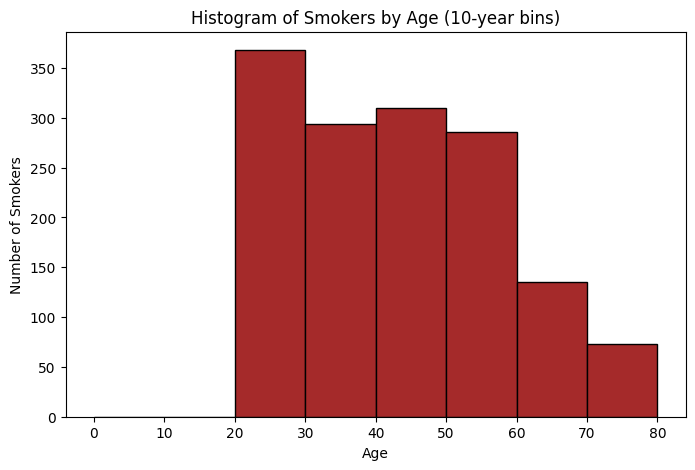

In [24]:
# 5. Does smoking differ by age? Histogram of smokers by age
smokers = df[df['SmokeNow'] == 'Yes']
plt.figure(figsize=(8,5))
plt.hist(smokers['Age'], bins=range(0, int(df['Age'].max())+10, 10), color='brown', edgecolor='black')
plt.title('Histogram of Smokers by Age (10-year bins)')
plt.xlabel('Age')
plt.ylabel('Number of Smokers')
plt.show()

# Project 4B Conclusions

1. What is the probability of a person over 65 having diabetes - 21.3%
2. What is the probability of males over 65 having diabetes - 22.0%
3. What is the probability of females over 65 having diabetes - 20.9%
4. What is the probability of smokers over 65 having diabetes - 12.0%
5. Does smoking differ by age?  Compute a histogram of smokers with the interval being 10 years. - Yes. The peak is for those between 20 and 30 years, with a negative correlation with increase in age.